<a href="https://colab.research.google.com/github/Dtenisha/LetsGrowMore-VIP--internship/blob/main/Stock_market_analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LETS GROW MORE (VIP)
##Beginner level task - Stock Market Prediction And Forecasting Using Stacked LSTM
##OCTOBER - 2021
#Submitted by TENISHA D

In [2]:
import pandas as pd
import numpy as np

In [3]:
stock_data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
stock_data.shape

(2035, 8)

In [7]:
stock_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

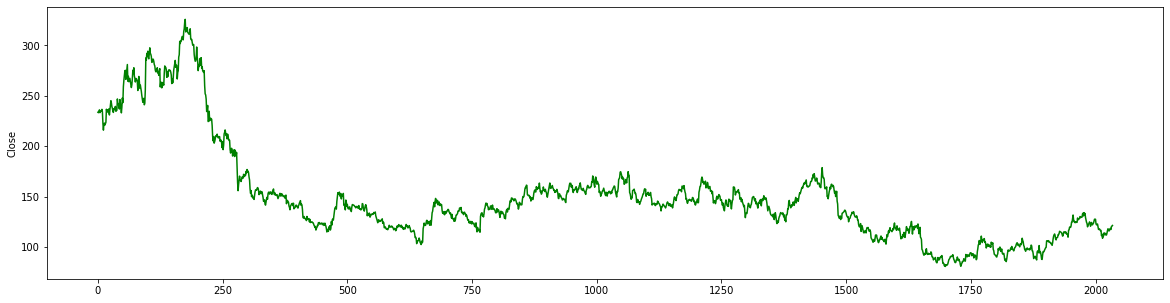

In [14]:
plt.figure(figsize=(20,5))
sns.lineplot(data=stock_data['Close'],color = 'g')

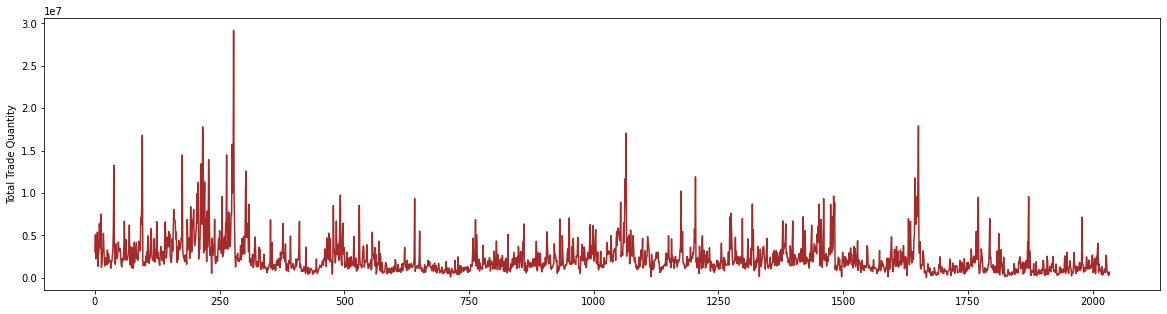

In [15]:
plt.figure(figsize=(20,5))
sns.lineplot(data=stock_data['Total Trade Quantity'],color = 'brown')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [12]:
df = scaler.fit_transform(np.array(stock_data['Close']).reshape(-1,1))


In [13]:
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [14]:

stock_data.sort_values(by = 'Date',ascending=True)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [15]:
#train and test split
train_size = int(len(df)*0.65)
test_size = int(len(df)-train_size)
train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]
              

In [16]:
train_size,test_size

(1322, 713)

In [17]:
def create_data(data,time_step=1):
  datax,datay = [],[]
  for i in range(len(data)-time_step-1):
    a = data[i:(i+time_step),0]
    datax.append(a)
    datay.append(data[i+time_step,0])
  return np.array(datax),np.array(datay)

In [18]:
time_step = 250
x_train,y_train = create_data(train_data,time_step)
x_test,y_test = create_data(test_data,time_step)

In [19]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
### create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (250,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 250,batch_size=64,verbose = 1)

Epoch 1/250
17/17 [==============================] - 14s 554ms/step - loss: 0.0137 - val_loss: 0.0036
Epoch 2/250
17/17 [==============================] - 8s 479ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 3/250
17/17 [==============================] - 8s 481ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 4/250
17/17 [==============================] - 8s 480ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/250
17/17 [==============================] - 8s 476ms/step - loss: 9.5543e-04 - val_loss: 0.0015
Epoch 6/250
17/17 [==============================] - 8s 474ms/step - loss: 8.9353e-04 - val_loss: 0.0011
Epoch 7/250
17/17 [==============================] - 8s 478ms/step - loss: 8.5858e-04 - val_loss: 0.0010
Epoch 8/250
17/17 [==============================] - 8s 477ms/step - loss: 8.6156e-04 - val_loss: 0.0012
Epoch 9/250
17/17 [==============================] - 8s 479ms/step - loss: 8.2986e-04 - val_loss: 0.0010
Epoch 10/250
17/17 [==============================] - 8s 479ms/step - 

In [1]:
import tensorflow as tf

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

144.31950701125305

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

105.73056753117211

In [37]:
import numpy

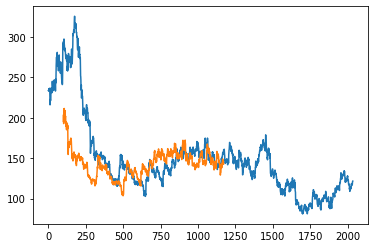

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()